In [16]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

import_dir = os.path.abspath('..')
if not import_dir in sys.path:
    sys.path.append(import_dir)
from utility.structure import Material, CylinderShape, StringSetting, StringPinch, String
from utility.util import play, get_signal_from_modes

In [14]:
mat = 'steel'
l = 0.8 # longueur de la corde en mètres.
d = 0.001 # diamètre de la corde en mètres.

tau = 100
boundaries = 'simply-supported'

# Position de pincement : près du manche.
x_p = 0.1 * l
h = 0.02 # 2 cm semble raisonnable.


string = String(CylinderShape(l, d), Material.make(mat))

y_n = string.compute_transversal_eigenmodes(StringSetting(tau, boundaries), StringPinch(x_p, h))

KeyError: 'metal'

In [15]:
f_e = 48000 # Hertz
nb_modes = 10 # nombre de modes à considérer.
dur = 5 # secondes

nb_samples = int(np.floor(f_e * dur))
ts = np.linspace(start=0, stop=dur, num=nb_samples)
print(ts.shape)
# Position d'écoute : près du manche aussi ?
x_0 = 0.9 * l

y = get_signal_from_modes(y_n, nb_modes, ts, x_0)

(240000,)
(11, 240000)



/tmp/tmpu76_55evSON_TP.wav:

 File Size: 480k      Bit Rate: 768k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 48000Hz      
Replaygain: off         
  Duration: 00:00:05.00  

In:0.00% 00:00:00.00 [00:00:05.00] Out:0     [      |      ]        Clip:0    

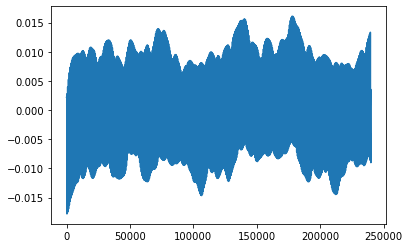

In [13]:
play(y/np.max(y), f_e)
plt.plot(y)